In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 선형회귀 
#### 경사하강법 : 회귀에서 오차를 줄이는 방법

In [6]:
n_samples = 200
x = np.random.randn(n_samples)

#### 생성데이터에 노이즈를 추가 

In [7]:
w = 2
b = 3
noise = np.random.randn(n_samples)
y = w * x + b + noise

C:\python\ml308\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


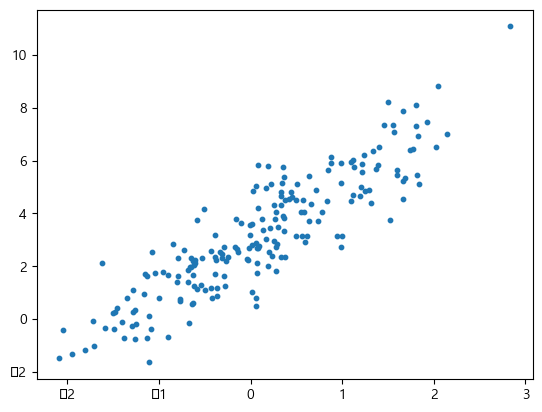

In [8]:
plt.scatter(x, y, s=10)

In [9]:
from sklearn.linear_model import LinearRegression as lr

In [10]:
leg = lr()

### 다중선형회귀 : 독립변수가 여러개인 경우 y를 예측
### 입력데이터는 2차원으로 입력해야 함. 
#### 항목이 하나인 경우 항목명.reshape(-1,1)
#### 항목이 여러개인 경우 np.array(항목)로 배열로 변환하거나 pd.Dataframe형태로 변환

In [16]:
leg.fit(x.reshape(-1,1), y)

LinearRegression()

In [17]:
## 절편
leg.coef_

array([2.05288624])

In [18]:
## 기울기
leg.intercept_

2.992500769551463

In [21]:
rslt = leg.score
rslt

<bound method RegressorMixin.score of LinearRegression()>

### 다중선형회귀 예제

In [22]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

In [23]:
w = 2
b1 = 3
b2 = 4
noise = np.random.randn(n_samples)
y = b1 * x1  + b2 * x2 + w + noise

In [24]:
mlr = lr()

In [29]:
x3 = pd.DataFrame({'x1':x1, 'x2':x2})

In [30]:
mlr.fit(x3, y)

LinearRegression()

In [31]:
mlr.coef_

array([3.05588727, 3.98350713])

In [32]:
mlr.intercept_

2.0236706632485584

In [33]:
# tuple형태로 결과가 나옴
mlr.coef_ , mlr.intercept_

(array([3.05588727, 3.98350713]), 2.0236706632485584)

### 경사하강법 : 오차를 줄이기 위해 가중치를 갱신하는 최적화기법 
#### 에러의 총합을 촤소화하는것은 미분한결과를 갱신하여 최소화함
#### 최소오차와 랜덤값을 미분했을때 +값인 경우 -쪽으로 최소화하고 미분했을때 -인 경우 +쪽으로 최소화하고 변수가 여러개인 경우 편미분함
#### 미분(에러값 총합/ x 가중치)을 하면 기울기가 나오는데 기울기가 많으면 에러최소값이 멀고 기울기가 작을수록 최소화값에 가까워짐

#### learning_rate : 오차를 최소화하기 위한 주기(예 : 200개 자료가 있는 경우 1개부터~200깨까지 학습률을 곱해서 미분한결과를 조금씩 갱신함 - 학습률은 떨어지고 학습시간이 오래걸리나 정확도가 높아짐)

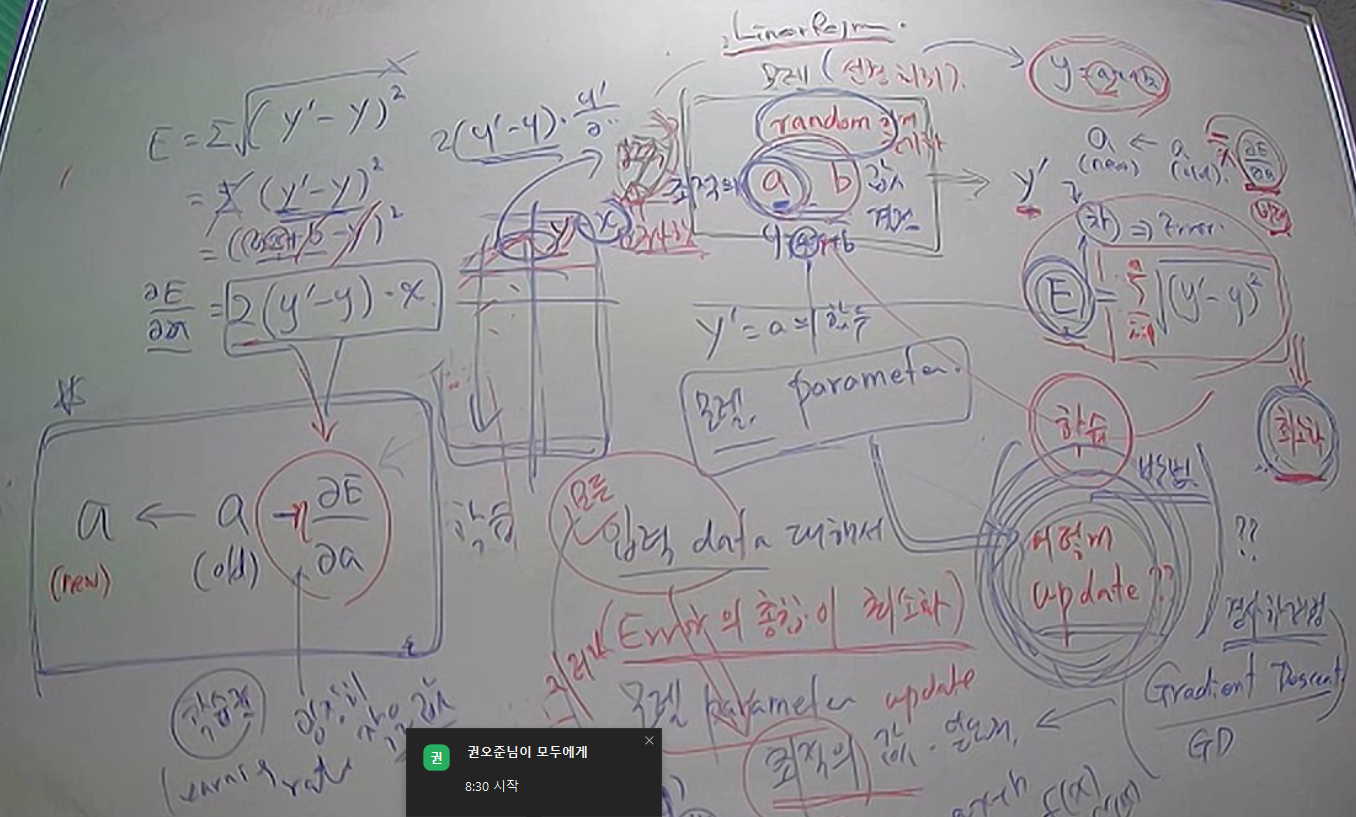

### M2 230페이지에 직접 미분을 이용해 경사하강법 수행하는 법이 기술되어 있음 

In [34]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

w = 2
b1 = 3
b2 = 4
noise = np.random.randn(n_samples)

y = b1 * x1  + b2 * x2 + w + noise
x3 = pd.DataFrame({'x1':x1, 'x2':x2})

In [35]:
np.random.uniform()

0.03305266767903037

In [47]:
# random한 가중치 지정  - uniform : 0에서 1사이의 값
w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

In [48]:
# 학습률을 지정해 지정한값만큼 미분결과값 70%만 반영
learn_rate = 0.7

In [49]:
# 반복학습 수
num_epoch = 20

### # 에러 총합(loss function, 손실함수)을 구하고 경사하강법(기울기에 따라 내려가는 방법)으로 오차가 최소화되도록 가중치를 조정 

In [50]:

for epo in range(num_epoch):
    y_pred = w1 * x1 + w2 * x2 + b
    err = np.abs(y_pred - y).mean()
    print(f"{epo:2} w1 = {w1:.6f}, w2 = {w2:.6f},  b={b:.6f}, err = {err:.6f}")
    
    w1 = w1 - learn_rate * ((y_pred - y) * x1).mean()
    w2 = w2 - learn_rate * ((y_pred - y) * x2).mean()
    b = b - learn_rate *((y_pred - y)).mean()

 0 w1 = 0.220374, w2 = 0.003504,  b=0.623018, err = 4.446620
 1 w1 = 2.579859, w2 = 2.948748,  b=1.722803, err = 1.314579
 2 w1 = 2.985875, w2 = 3.765600,  b=1.970050, err = 0.878386
 3 w1 = 3.045620, w2 = 3.999393,  b=2.027953, err = 0.849094
 4 w1 = 3.050697, w2 = 4.067952,  b=2.042180, err = 0.846821
 5 w1 = 3.049534, w2 = 4.088419,  b=2.045861, err = 0.846460
 6 w1 = 3.048615, w2 = 4.094606,  b=2.046861, err = 0.846442
 7 w1 = 3.048215, w2 = 4.096493,  b=2.047145, err = 0.846431
 8 w1 = 3.048068, w2 = 4.097072,  b=2.047229, err = 0.846427
 9 w1 = 3.048018, w2 = 4.097251,  b=2.047254, err = 0.846425
10 w1 = 3.048001, w2 = 4.097306,  b=2.047261, err = 0.846424
11 w1 = 3.047996, w2 = 4.097323,  b=2.047264, err = 0.846424
12 w1 = 3.047994, w2 = 4.097328,  b=2.047265, err = 0.846424
13 w1 = 3.047994, w2 = 4.097330,  b=2.047265, err = 0.846424
14 w1 = 3.047993, w2 = 4.097330,  b=2.047265, err = 0.846424
15 w1 = 3.047993, w2 = 4.097330,  b=2.047265, err = 0.846424
16 w1 = 3.047993, w2 = 4

### M2 234페이지 붓꽃데이터로 선형회귀 

In [51]:
from sklearn.datasets import load_iris

In [53]:
iris = load_iris()

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [56]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [62]:
t= list(zip(iris.feature_names, iris.target_names))
t

[('sepal length (cm)', 'setosa'),
 ('sepal width (cm)', 'versicolor'),
 ('petal length (cm)', 'virginica')]

In [67]:
x_all = iris.data
x = x_all[:,0]
y = x_all[:,2]

In [68]:
x[:5]

array([5.1, 4.9, 4.7, 4.6, 5. ])

In [69]:
y[:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [73]:
from sklearn.model_selection import train_test_split

In [76]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=7, shuffle=True)

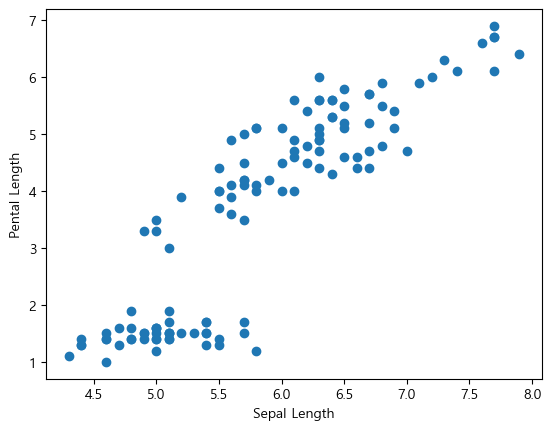

In [79]:
plt.scatter(train_x, train_y, marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Pental Length')
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()

In [82]:
linr.fit(train_x.reshape(-1,1) , train_y)

LinearRegression()

In [87]:
# R2Square : 결정계수로 1에 가까울수록 예측력이 좋고 0에 가까우면 학습이 낮음
linr.score(test_x.reshape(-1,1), test_y)

0.6545777123136307

In [90]:
a = linr.coef_
b = linr.intercept_

### 학습결과를 시각화

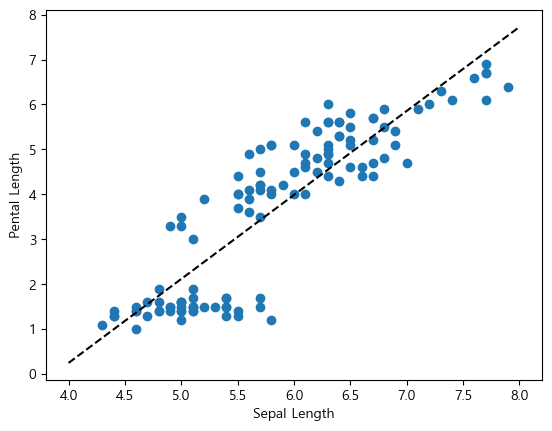

In [91]:
plt.scatter(train_x, train_y, marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Pental Length')

xx = np.linspace(4,8, 10)
plt.plot(xx, a*xx + b , 'k--' )
plt.show()

### 성별에 따른 몸무게 예측 

In [96]:
n_sample = 1000
x1 = 170 + 3 * np.random.randn(n_sample)
x2 = 160 + 2 * np.random.randn(n_sample)
y1 = (2 * x1) - 270 +  2 * np.random.randn(n_sample)
y2 = (1 * x2) - 100 +  np.random.randn(n_sample)

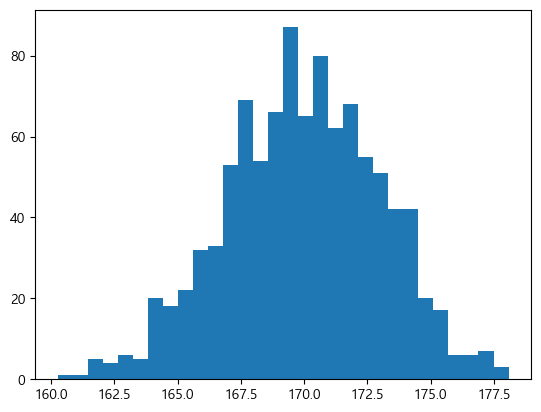

In [94]:
plt.hist(x1, bins=30)
plt.show()

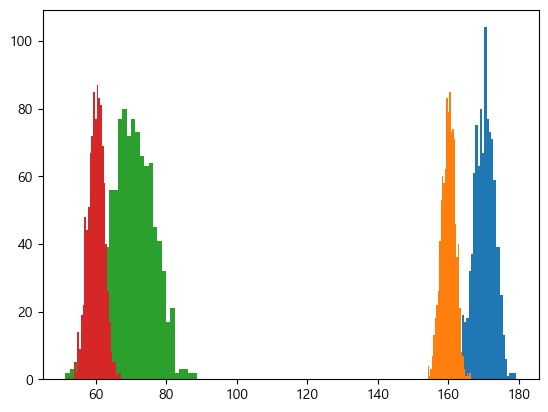

In [97]:
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [98]:
train_x, test_x, train_y, test_y = train_test_split(x1, y1, test_size=0.2, random_state=7, shuffle=True)

In [99]:
leg1 = LinearRegression()
leg1.fit(train_x.reshape(-1,1) , train_y)

LinearRegression()

In [100]:
leg1.coef_, leg1.intercept_

(array([1.99655265]), -269.59596691353414)

In [101]:
leg1.score(test_x.reshape(-1,1), test_y)

0.8989159510851731

### 남녀데이터(x1과 x2)을 합쳐서 선형회귀예측 

In [102]:
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

In [103]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)

In [104]:
leg2 = LinearRegression()
leg2.fit(train_x.reshape(-1,1) , train_y)

LinearRegression()

In [108]:
leg2.coef_, leg2.intercept_

(array([1.13148316]), -121.64320048600946)

In [110]:
aa = leg2.coef_
bb = leg2.intercept_

In [106]:
leg2.score(test_x.reshape(-1,1), test_y)

0.8619897546545117

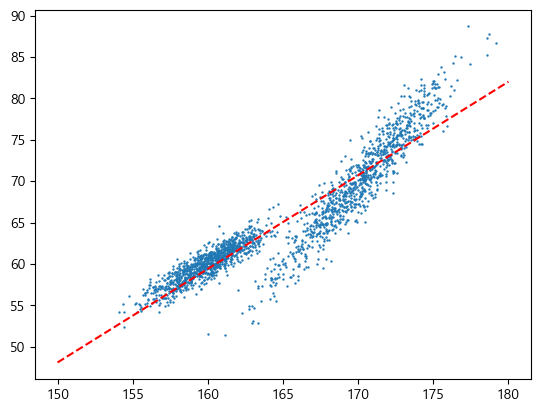

In [113]:
plt.scatter(x,y, s=0.5)

xx = np.linspace(150, 180, 10)
plt.plot(xx, aa*xx + bb , 'r--' )
plt.show()